In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# EDA

In [2]:
df2 = pd.read_excel('DDS10_Data_Extract_with_labels_1.xlsx')

In [3]:
df2.head()

,record - Record number,"Q1r1 - To begin, what is your age?",Q4 - What is your gender?,age - you are...,Q2 - In which state do you currently reside?,region - Region,QNEW3 - What is your employment status?,Q5 - Which category best describes your ethnicity?,QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,QNEW2 - How old are the children in your home?-0-4 years,...,"Q39rNEW1 - I would rather pay for sports information online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, c","Q39rNEW2 - I would rather pay for games online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39rNEW3 - I would rather pay for music online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39rNEW4 - I would rather pay for TV shows online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A","Q39rNEW5 - I would rather pay for movies online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39r2 - I would be willing to provide more personal information online if that meant I could receive advertising more targeted to my needs and interests. - Using the scale below, please indicate how much you agree or disagree with the following statements.","Q39r3 - By providing more personal information online, I am worried about becoming a victim of identity theft. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, cho","Q39r4 - I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the quest",Q89 - Which of the following is your most frequently used mechanism to get news?,Final Weighting
0,7.0,31.0,Female,30-46,Illinois,Midwest,Unemployed,White or Caucasian (Non-Hispanic),Yes,No,...,Agree somewhat,Agree strongly,Agree strongly,Agree somewhat,Agree strongly,Agree somewhat,Agree somewhat,Agree somewhat,Social media sites,0.442299
1,4.0,30.0,Female,30-46,Arkansas,South,Unemployed,White or Caucasian (Non-Hispanic),Yes,Yes,...,Disagree strongly,Disagree strongly,Disagree strongly,Disagree somewhat,Disagree strongly,Disagree somewhat,Agree somewhat,Agree strongly,Social media sites,1.817374
2,8.0,61.0,Male,47-65,Alabama,South,Retired,White or Caucasian (Non-Hispanic),No,NaN,...,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Agree strongly,Agree strongly,Television news stations,3.765430
3,3.0,68.0,Female,66 or older,New York,Northeast,Retired,White or Caucasian (Non-Hispanic),No,NaN,...,N/A; I do not have a basis to answer,N/A; I do not have a basis to answer,N/A; I do not have a basis to answer,Disagree strongly,Disagree somewhat,Disagree strongly,Agree strongly,Agree somewhat,Television news stations,0.183383
4,15.0,50.0,Female,47-65,Iowa,Midwest,Employed full-time or part-time,White or Caucasian (Non-Hispanic),No,NaN,...,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Agree somewhat,Agree somewhat,Television news stations,2.852513


In [4]:
df2.shape

(2209, 197)

In [5]:
df3 = pd.read_excel('DDS11_Data_Extract_with_labels_1.xlsx')

In [6]:
df3.head()

,record - Record number,"Q1r1 - To begin, what is your age?",Q4 - What is your gender?,age - you are...,Q2 - In which state do you currently reside?,region - Region,QNEW3 - What is your employment status?,Q5 - Which category best describes your ethnicity?,QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,QNEW2 - How old are the children in your home?-0-4 years,...,"Q39rNEW1 - I would rather pay for sports information online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, c","Q39rNEW2 - I would rather pay for games online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39rNEW3 - I would rather pay for music online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39rNEW4 - I would rather pay for TV shows online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A","Q39rNEW5 - I would rather pay for movies online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39r2 - I would be willing to provide more personal information online if that meant I could receive advertising more targeted to my needs and interests. - Using the scale below, please indicate how much you agree or disagree with the following statements.","Q39r3 - By providing more personal information online, I am worried about becoming a victim of identity theft. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, cho","Q39r4 - I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription.(e.g., reduced subscription cost by 25%) - Using the scale below, please indicate how much you agree or disagree wit",Q89 - Which of the following is your most frequently used mechanism to get news?,FINAL WEIGHTS
0,4,36,Male,34-50,Georgia,South,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,No,...,Agree strongly,Agree somewhat,Agree somewhat,Agree strongly,Agree strongly,Agree strongly,Agree somewhat,Agree strongly,Magazine,0.083025
1,6,26,Female,20-26,New York,Northeast,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,Yes,...,Agree somewhat,Agree somewhat,Disagree somewhat,Disagree somewhat,Disagree somewhat,Agree somewhat,Disagree somewhat,Disagree somewhat,Print newspapers,0.104475
2,9,32,Female,27-33,New Jersey,Northeast,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,Yes,...,Agree somewhat,Agree somewhat,Agree strongly,Agree strongly,Agree strongly,Agree somewhat,Agree strongly,Agree strongly,News aggregators,0.312870
3,11,25,Female,20-26,California,West,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,Yes,...,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Online version of newspapers,2.163659
4,3,28,Male,27-33,Indiana,Midwest,Student,White or Caucasian (Non-Hispanic),Yes,Yes,...,Agree somewhat,Disagree somewhat,N/A; I do not have a basis to answer,Disagree somewhat,Disagree somewhat,Agree somewhat,Agree somewhat,Disagree somewhat,Online version of newspapers,0.705765


In [7]:
df2.shape

(2209, 197)

In [8]:
# Filter data sets on questions we believe are helpful predictors
regex_string = r'(.*Q29.*)|(.*QNEW24.*)|(.*Q37r10.*)|(.*Q73r13.*)|(.*QNEW3.*)|(.*Q6.*)|(.*(Q8|Q10).*(-Tablet|-Streaming media box|-Portable streaming thumb drive/fob|-Gaming|-Portable video|-Computer network|-Desktop|-Laptop|-Tablet|-Smartphone|-None of the above).*)|(.*Q11(r3|r4|r6|r8|r9|r10|r12|r15).*)|(.*(Q26|Q36).*(internet|Streaming|Gaming|None of the above).*)'

In [9]:
pd.set_option("display.max_columns", None)

In [10]:
dfnew2 = df2.filter(regex=regex_string)
dfnew2

,QNEW3 - What is your employment status?,"Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.",Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob,Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable video game player,Q8 - Which of the following media or home entertainment equipment does your household own?-Computer network/router in your home for wireless computer/laptop usage,Q8 - Which of the following media or home entertainment equipment does your household own?-Desktop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Laptop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Tablet,Q8 - Which of the following media or home entertainment equipment does your household own?-Smartphone,Q8 - Which of the following media or home entertainment equipment does your household own?-None of the above,"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Streaming media box or over-the-top box","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable streaming thumb drive/fob","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Gaming console","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable video game player","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Computer network/router in your home for wireless computer/laptop usage","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Desktop computer","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Laptop computer","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Tablet","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Smartphone","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-None of the above","Q11r3 - Streaming media box or over-the-top box - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selectio","Q11r4 - Portable streaming thumb drive/fob - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. M","Q11r6 - Gaming console - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish","Q11r8 - Computer network/router in your home for wireless computer/laptop usage - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most va","Q11r9 - Desktop computer - Of the products you indicated you own, which [totalcount] do you value the

In [11]:
dfnew2 = dfnew2.iloc[:,:-1]

In [12]:
dfnew3 = df3.filter(regex=regex_string)
dfnew3

,QNEW3 - What is your employment status?,"Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.",Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob,Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable video game player,Q8 - Which of the following media or home entertainment equipment does your household own?-Computer network/router in your home for wireless computer/laptop usage,Q8 - Which of the following media or home entertainment equipment does your household own?-Desktop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Laptop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Tablet,Q8 - Which of the following media or home entertainment equipment does your household own?-Smartphone,Q8 - Which of the following media or home entertainment equipment does your household own?-None of the above,"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Streaming media box or over-the-top box","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable streaming thumb drive/fob","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Gaming console","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable video game player","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Computer network/router in your home for wireless computer/laptop usage","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Desktop computer","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Laptop computer","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Tablet","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Smartphone","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-None of the above","Q11r3 - Streaming media box or over-the-top box - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selectio","Q11r4 - Portable streaming thumb drive/fob - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. M","Q11r6 - Gaming console - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish","Q11r8 - Computer network/router in your home for wireless computer/laptop usage - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most va","Q11r9 - Desktop computer - Of the products you indicated you own, which [totalcount] do you value the

In [13]:
dfnew3 = dfnew3.iloc[:,:-1]
dfnew3

,QNEW3 - What is your employment status?,"Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.",Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob,Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable video game player,Q8 - Which of the following media or home entertainment equipment does your household own?-Computer network/router in your home for wireless computer/laptop usage,Q8 - Which of the following media or home entertainment equipment does your household own?-Desktop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Laptop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Tablet,Q8 - Which of the following media or home entertainment equipment does your household own?-Smartphone,Q8 - Which of the following media or home entertainment equipment does your household own?-None of the above,"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Streaming media box or over-the-top box","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable streaming thumb drive/fob","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Gaming console","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable video game player","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Computer network/router in your home for wireless computer/laptop usage","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Desktop computer","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Laptop computer","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Tablet","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Smartphone","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-None of the above","Q11r3 - Streaming media box or over-the-top box - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selectio","Q11r4 - Portable streaming thumb drive/fob - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. M","Q11r6 - Gaming console - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish","Q11r8 - Computer network/router in your home for wireless computer/laptop usage - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most va","Q11r9 - Desktop computer - Of the products you indicated you own, which [totalcount] do you value the

In [14]:
# Merge 2010 and 2011 data
df_2_3 = pd.concat([dfnew2,dfnew3],ignore_index=True,sort=False)

In [15]:
# Binarily encode if participant is student or not
df_2_3["is_student"] = df_2_3["QNEW3 - What is your employment status?"].apply(lambda x: 1 if x == "Student" else 0)
df_2_3.drop(columns=["QNEW3 - What is your employment status?"], inplace=True)

In [16]:
# Encode yesses and nos as binary values
df_2_3.replace("Yes", 1, inplace=True)
df_2_3.replace("No", 0, inplace=True)

In [17]:
df_2_3.isnull().count()

Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.                                                                               4340
Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box                                                                                                                                  4340
Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob                                                                                                                                       4340
Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console                                                                                                    

In [18]:
df_2_3.isnull().sum()

Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.                                                                                  4
Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box                                                                                                                                     4
Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob                                                                                                                                          4
Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console                                                                                                    

In [19]:
df_2_3.isnull().sum().sum()

40834

In [20]:
# Separate textual data from numerical
df_text = df_2_3.loc[:,['Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.','Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?']]
df_2_3.drop(["Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.","Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?"],axis=1,inplace=True)


In [21]:
df_2_3.fillna(value = 4,inplace=True)

In [22]:
df_2_3.isnull().sum().sum()

0

In [23]:
# No need to drop na since no nulls in 2_3 after filling
df_merged = pd.concat([df_2_3,df_text],axis=1)

In [24]:
df_merged.isnull().sum().sum()

999

In [25]:
income = df_merged['Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.'].to_numpy()
income = income.reshape(-1, 1)
ohe = OneHotEncoder().fit_transform(income).toarray()
df_income = pd.DataFrame(ohe)
df_merged = pd.concat([df_merged,df_income],axis=1)
df_merged

,Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob,Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable video game player,Q8 - Which of the following media or home entertainment equipment does your household own?-Computer network/router in your home for wireless computer/laptop usage,Q8 - Which of the following media or home entertainment equipment does your household own?-Desktop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Laptop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Tablet,Q8 - Which of the following media or home entertainment equipment does your household own?-Smartphone,Q8 - Which of the following media or home entertainment equipment does your household own?-None of the above,"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Streaming media box or over-the-top box","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable streaming thumb drive/fob","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Gaming console","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable video game player","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Computer network/router in your home for wireless computer/laptop usage","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Desktop computer","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Laptop computer","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Tablet","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Smartphone","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-None of the above","Q11r3 - Streaming media box or over-the-top box - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selectio","Q11r4 - Portable streaming thumb drive/fob - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. M","Q11r6 - Gaming console - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish","Q11r8 - Computer network/router in your home for wireless computer/laptop usage - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most va","Q11r9 - Desktop computer - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish to rank. The fir","Q11r10 - Laptop computer - Of the products you indicated you own,

In [26]:
# Shape before and after dropping rows with missing values
print(df_merged.shape)
df_merged.dropna(inplace=True)
print(df_merged.shape)

(4340, 49)
(3345, 49)


In [27]:
df_merged['Target Variable'] = np.select([df_merged['Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?']=='I am willing to pay $5 per month on top of what I already pay',df_merged['Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?']=='I am willing to pay $10 per month on top of what I already pay',df_merged['Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?']=='I am willing to pay $20 per month on top of what I already pay',df_merged['Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?']=='I am willing to pay $30 per month on top of what I already pay',df_merged['Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?']=='I am not willing to pay more for faster download speeds as my current speed is sufficient for my needs',df_merged['Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?']=='I prefer faster speed but I am unwilling to pay more than I already do'],[1,1,1,1,0,0])

C:\Users\sobko\miniconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sobko\miniconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

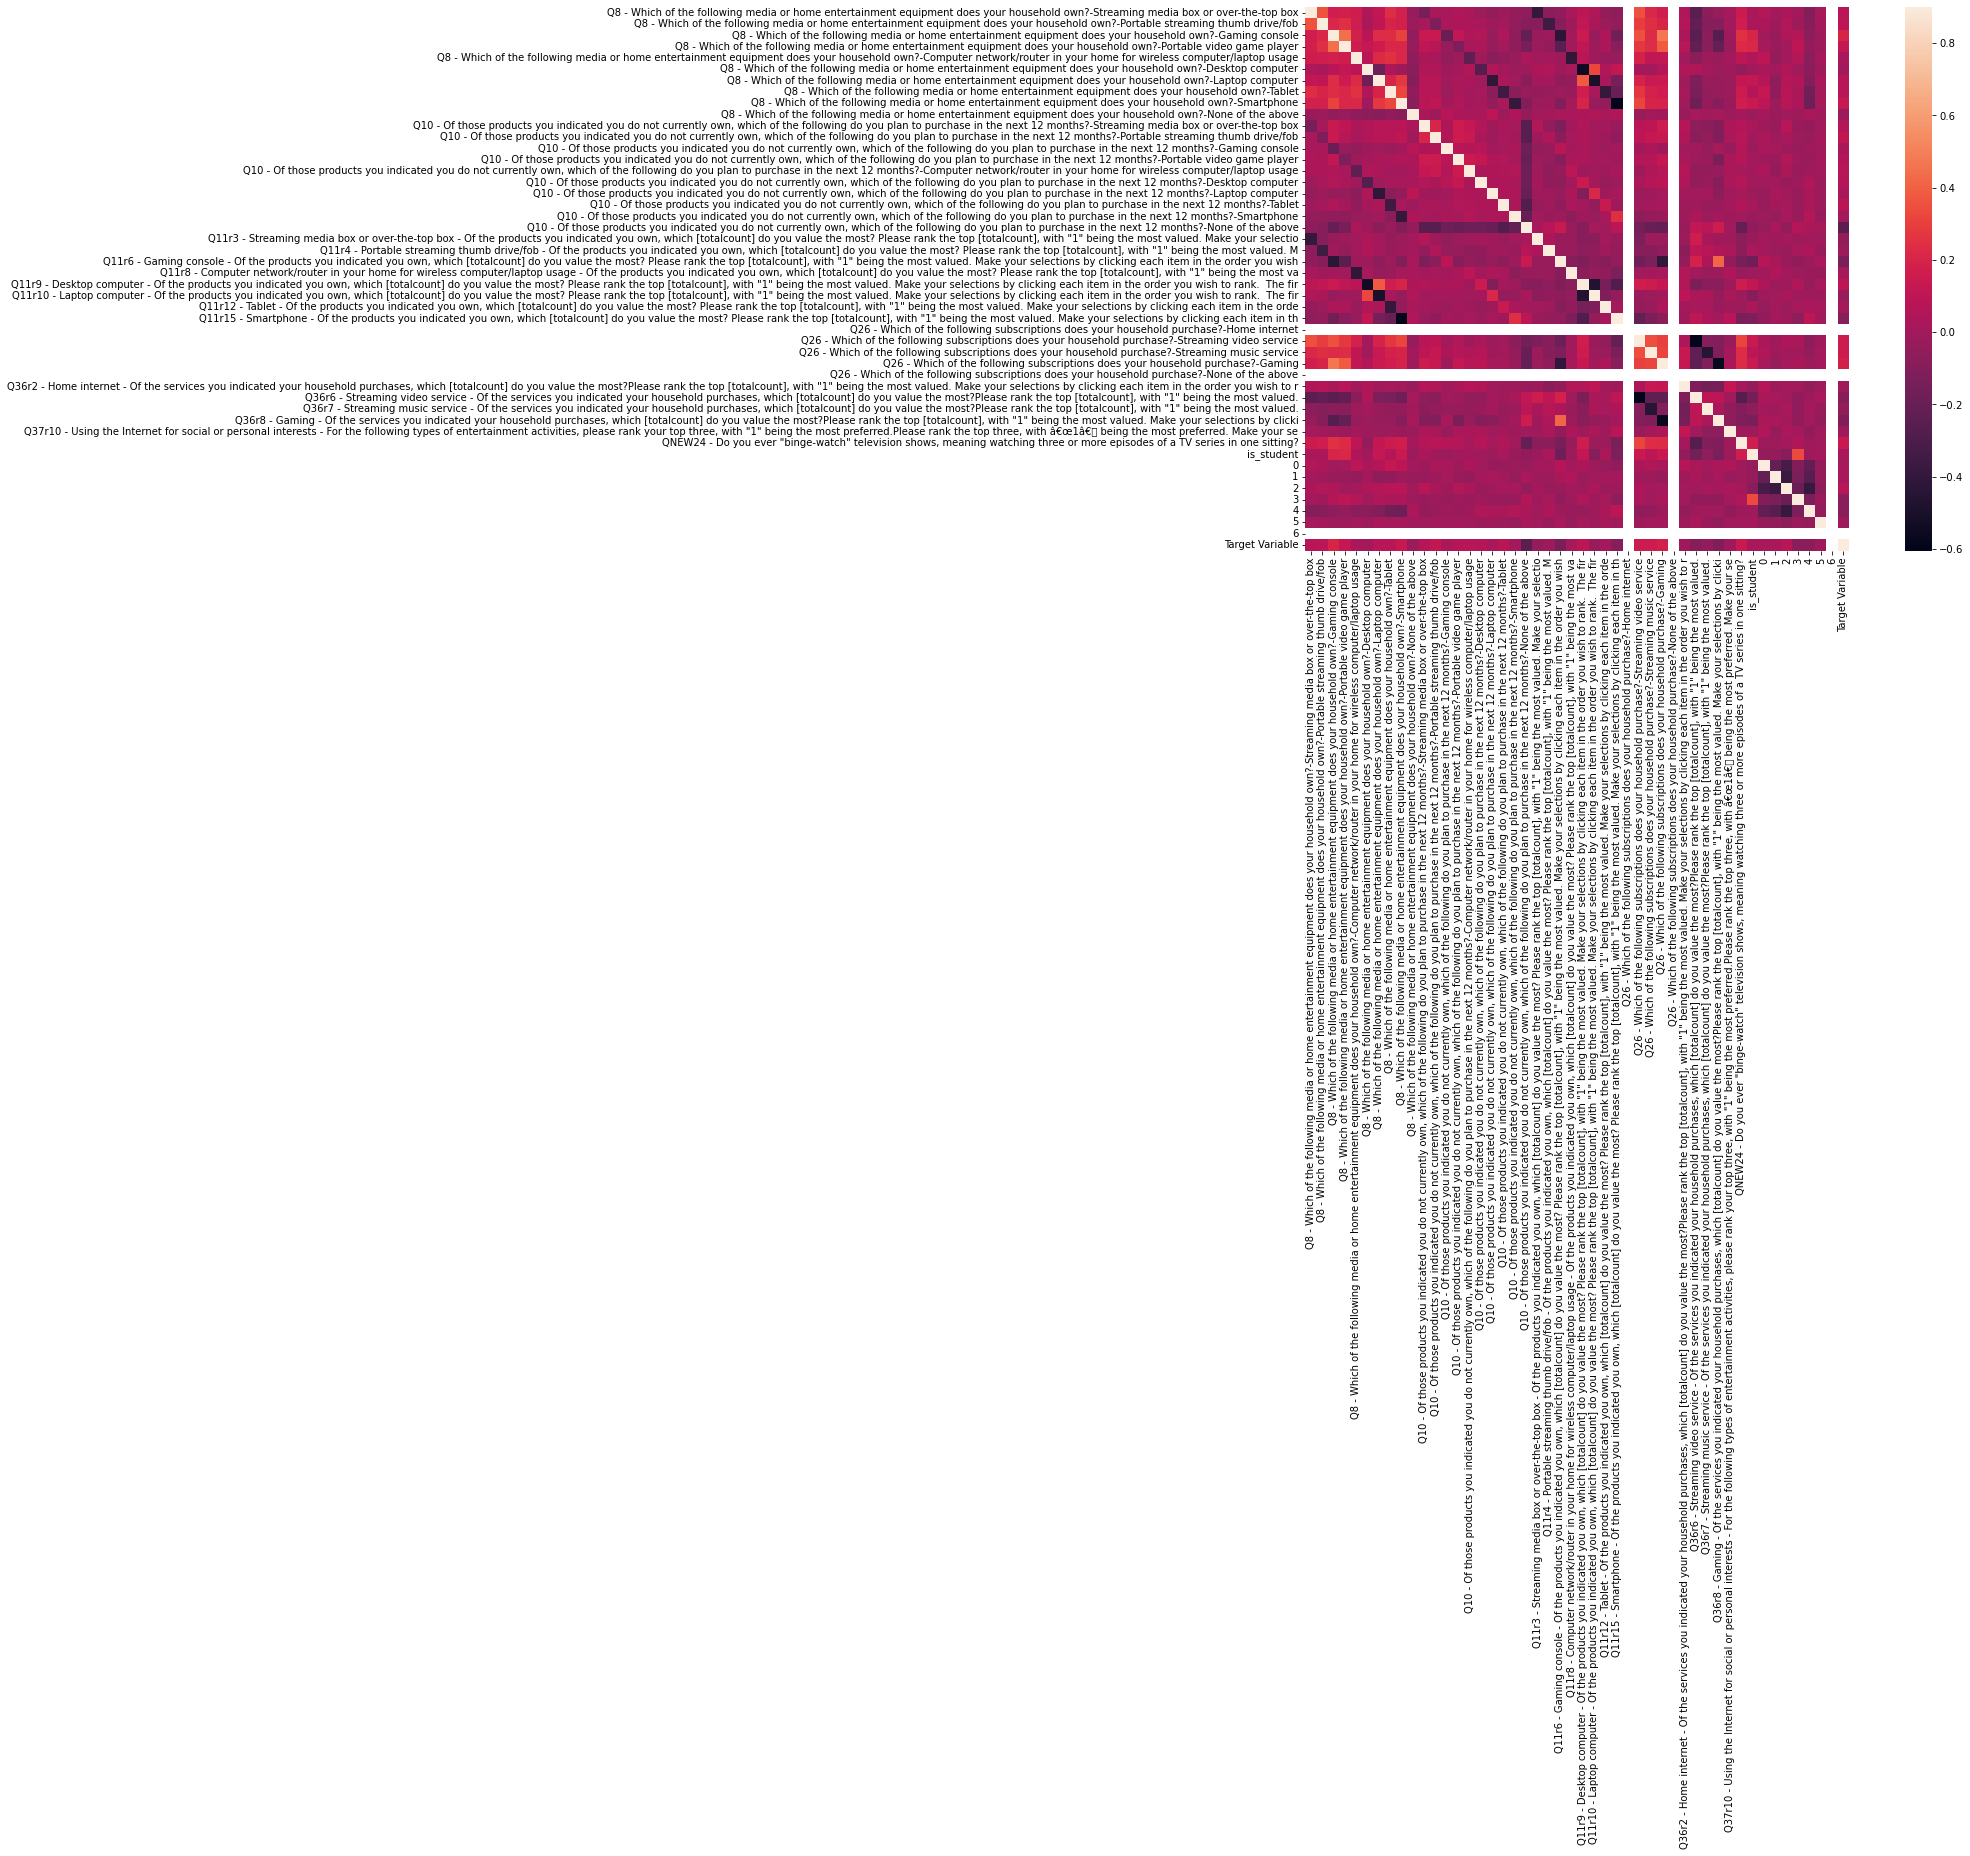

In [28]:
# Heatmap to see best correlations
corrmat = df_merged.corr()
plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.9, square=True)

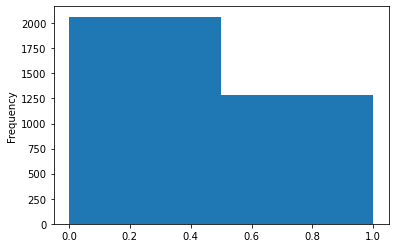

In [29]:
# Target variable histogram (Will pay for double speed internet)
df_merged['Target Variable'].plot.hist(bins=2)
plt.title="Will Pay For Double Internet Speed"
plt.show()

# Modeling

In [30]:
# Train test split
X_columns=df_merged.drop(columns=['Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?','Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.','Target Variable'])
X = X_columns.values
Y=df_merged['Target Variable'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

In [31]:
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',Y_train.shape)
print('Shape of Y_test=>',Y_test.shape)

Shape of X_train=> (3010, 47)
Shape of X_test=> (335, 47)
Shape of Y_train=> (3010,)
Shape of Y_test=> (335,)


#### Decision Tree

In [32]:
# Building Decision Tree
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(X_train, Y_train)
dt_pred_train = dt.predict(X_train)

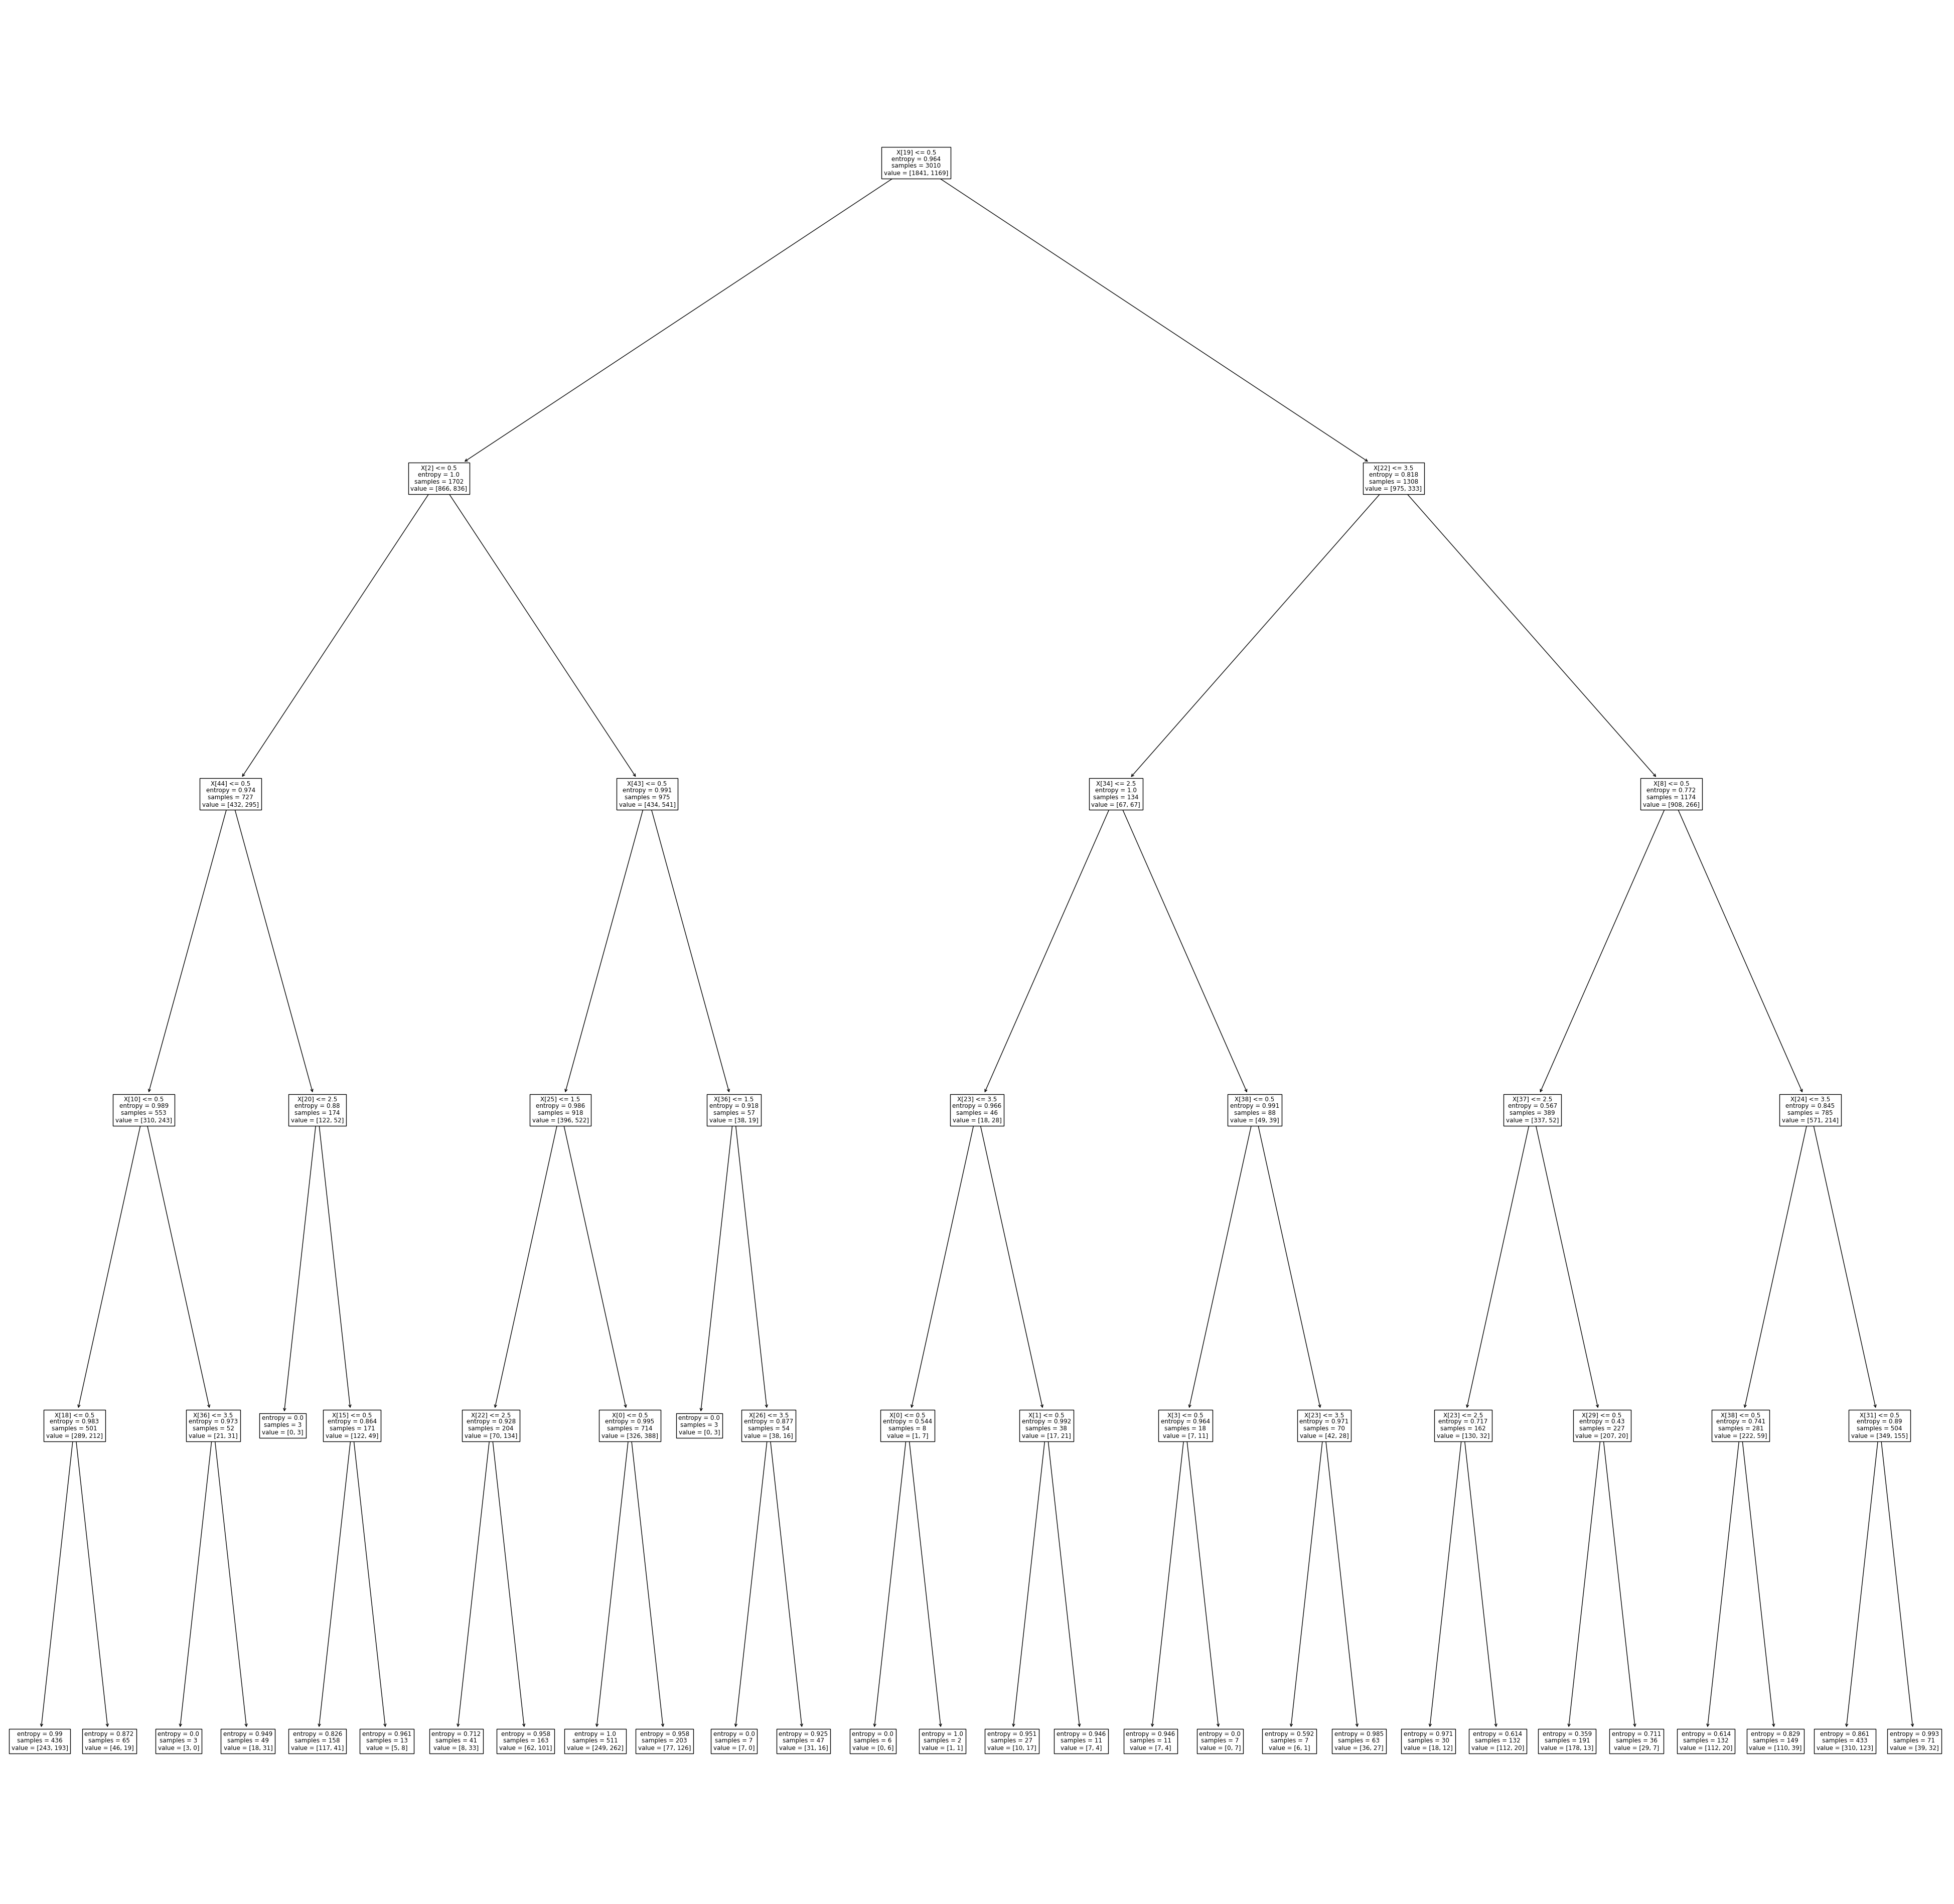

In [33]:
# Building Decision Tree (Max depth limited)
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42, max_depth=5)
dt.fit(X_train, Y_train)
dt_pred_train = dt.predict(X_train)

figure(figsize=(50,50),dpi=100)
tree.plot_tree(dt)
plt.show()

In [34]:
# Evaluating on Test set
dt_pred_test = dt.predict(X_test)
print('Test accuracy: ' + str(f1_score(Y_test,dt_pred_test)))

Test accuracy: 0.5267857142857143


In [35]:
# Building  Random Forest Classifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [36]:
# Evaluating on Test set
rfc_pred_test = rfc.predict(X_test)
print('Test accuracy: ' + str(f1_score(Y_test,rfc_pred_test)))

Test accuracy: 0.4924623115577889


In [37]:
#Logistic Regression: 1st Round
clf = LogisticRegression(max_iter=10000, random_state=42).fit(X_train, Y_train)
print("Test accuracy: " + str(clf.score(X_test, Y_test)))

Test accuracy: 0.6985074626865672


In [38]:
# K-Nearest Neighbors + Test Accuracy
X = X_columns.values
Y=df_merged['Target Variable'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

neigh = KNeighborsClassifier(n_neighbors=150)
neigh.fit(X_train, Y_train)
print(neigh.score(X_test, Y_test))

0.6686567164179105


In [39]:
# Support Vector Machine + Test Accuracy
clf_svm = svm.SVC(random_state=42)
clf_svm.fit(X_train,Y_train)
print(clf_svm.score(X_test, Y_test))

0.6895522388059702


In [40]:
# Naive Bayes + Test Accuracy
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
print(gnb.score(X_test, Y_test))

0.6955223880597015


In [41]:
# Gradient Boosting + Test Accuracy
gb_clf = GradientBoostingClassifier(n_estimators=150, learning_rate=1, max_depth=1, random_state=42)
gb_clf.fit(X_train, Y_train)
print(gb_clf.score(X_test, Y_test))

0.6985074626865672


In [42]:
# Deeper look at Logistic Regression
y_pred = clf.predict(X_test)
y_actual = Y_test

tn, fp, fn, tp = confusion_matrix(y_actual, y_pred).ravel()

In [43]:
print("Test true negatives: " + str(tn))
print("Test true positives: " + str(tp))
print("Test false negatives: " + str(fn))
print("Test false positives: " + str(fp))

Test true negatives: 185
Test true positives: 49
Test false negatives: 62
Test false positives: 39


In [44]:
coefs = pd.concat([pd.Series(clf.coef_[0]), pd.Series(X_columns.columns)], axis = 1)
coefs.rename(columns={0:"coefficients", 1: "Questions"}, inplace=True)
to_drop=coefs[coefs['coefficients'].between(-0.1,0.1, inclusive=False)]
coefs

C:\Users\sobko\AppData\Local\Temp/ipykernel_7900/2395955921.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  to_drop=coefs[coefs['coefficients'].between(-0.1,0.1, inclusive=False)]


,coefficients,Questions
0,-0.054266,Q8 - Which of the following media or home ente...
1,0.142253,Q8 - Which of the following media or home ente...
2,0.323224,Q8 - Which of the following media or home ente...
3,0.034171,Q8 - Which of the following media or home ente...
4,-0.098192,Q8 - Which of the following media or home ente...
5,0.147479,Q8 - Which of the following media or home ente...
6,-0.020008,Q8 - Which of the following media or home ente...
7,0.056200,Q8 - Which of the following media or home ente...
8,0.164645,Q8 - Which of the following media or home ente...
9,-0.297923,Q8 - Which of the following media or home ente...


In [45]:
# Drop all columns with a beta < .1 (absolute value)
coefs.drop(labels=[0,3,6,12,13,16,23,24,25,26,27,28,32,34,35,36,37,39,44,46],axis=0, inplace=True)

In [46]:
# Rerun Logistic Regression on most important features
X=df_merged[coefs["Questions"]].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)
clf2 = LogisticRegression(max_iter=1000, random_state=42).fit(X_train, Y_train)
print("Test accuracy: " + str(clf2.score(X_test, Y_test)))

Test accuracy: 0.7104477611940299


In [47]:
new_coefs = pd.DataFrame(clf2.coef_[0])
coefs.reset_index(inplace = True)
finals = pd.concat([coefs, new_coefs], axis = 1,ignore_index=True)
finals

,0,1,2,3
0,1,0.142253,Q8 - Which of the following media or home ente...,0.120445
1,2,0.323224,Q8 - Which of the following media or home ente...,0.345181
2,4,-0.098192,Q8 - Which of the following media or home ente...,-0.075272
3,5,0.147479,Q8 - Which of the following media or home ente...,-0.032174
4,7,0.056200,Q8 - Which of the following media or home ente...,0.062133
5,8,0.164645,Q8 - Which of the following media or home ente...,0.260314
6,9,-0.297923,Q8 - Which of the following media or home ente...,-0.313684
7,10,-0.185196,Q10 - Of those products you indicated you do n...,-0.179817
8,11,0.216819,Q10 - Of those products you indicated you do n...,0.217654
9,14,0.366661,Q10 - Of those products you indicated you do n...,0.331703


### Closer look at Logistic Regression

In [48]:
# Only use predictors with a beta absolute value >.3
finals_greater = (finals[finals[3] > .3])
finals_lesser = (finals[finals[3] < -.3])

finals_final = pd.concat([finals_lesser,finals_greater],axis=0)

finals_final.drop([0,1], inplace=True, axis=1)
finals_final.rename({2:"Question", 3: "Values"}, inplace=True, axis=1)

In [49]:
# Rename the columns
finals_final['Question']= finals_final['Question'].replace(['Q8 - Which of the following media or home entertainment equipment does your household own?-None of the above'],'Q8-None of the above')
finals_final['Question']= finals_final['Question'].replace(['Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-None of the above'],'Q10-None of the above')
finals_final['Question']= finals_final['Question'].replace([3],'Income-dont know')
finals_final['Question']= finals_final['Question'].replace(['Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console'],'Q8-Gaming Console')
finals_final['Question']= finals_final['Question'].replace(['Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Computer network/router in your home for wireless computer/laptop usage'],'Q10-Computer/Network Router')
finals_final['Question']= finals_final['Question'].replace(['Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Tablet'],'Q10-Tablet')
finals_final['Question']= finals_final['Question'].replace(['Q26 - Which of the following subscriptions does your household purchase?-Gaming'],'Q26-Gaming')
finals_final['Question']= finals_final['Question'].replace([1],'$30,000 -> $50,000')
finals_final['Question']= finals_final['Question'].replace([2],'$50,000 -> $100,000')


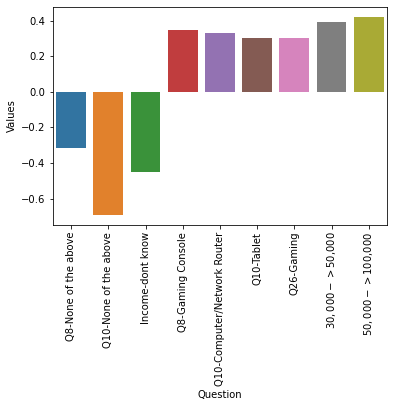

In [50]:
# Plot the beta values of the logistic model
ax = sns.barplot(x="Question", y="Values", data = finals_final)
plt.xticks(rotation=90)
plt.show()

# Thus concludes the data portion